# Fourier transform of images

Import required libraries.

In [32]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

Commonly used functions

In [33]:
def show2img(input1, input2, title1, tilte2):
    plt.figure()
    plt.subplot(1,2,1)
    if input1.ndim == 2:
        plt.imshow(input1, cmap= "gray", vmin= 0, vmax= 255)
    else:
        plt.imshow(input1[:,:,::-1], vmin= 0, vmax= 255)
    plt.title(title1)

    plt.subplot(1,2,2)
    if input1.ndim == 2:
        plt.imshow(input2, cmap= "gray", vmin= 0, vmax= 255)
    else:
        plt.imshow(input2[:,:,::-1], vmin= 0, vmax= 255)
    plt.title(tilte2)

Load image for testing

In [34]:
img1 = cv.imread("goldhill.bmp", cv.IMREAD_GRAYSCALE)
img1.shape

(512, 512)

Display loaded images

Text(0.5, 1.0, 'Original image')

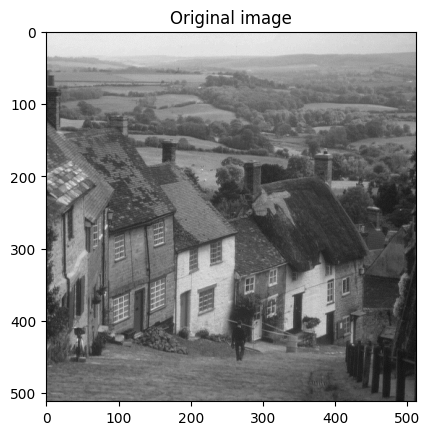

In [35]:
plt.imshow(img1, cmap = "gray", vmin= 0, vmax= 255)
plt.title("Original image")

### Perform Fourier Transform

In [36]:
dft = cv.dft(np.float32(img1),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

print("dft shape: ", dft.shape)
print("dft data type: ", dft.dtype)

magnitude_spectrum = np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

print(magnitude_spectrum.shape)
print(magnitude_spectrum.dtype)

dft shape:  (512, 512, 2)
dft data type:  float32
(512, 512)
float32


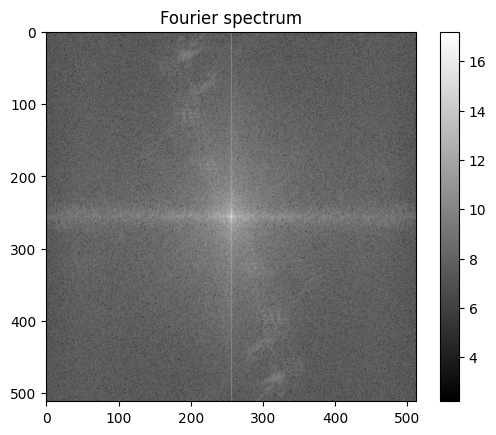

In [37]:
plt.imshow(magnitude_spectrum, cmap= "gray")
plt.title("Fourier spectrum")
plt.colorbar()

In [38]:
invImg= cv.idft(dft, flags= cv.DFT_SCALE)

In [39]:
print(invImg.max())
print(invImg.dtype)

236.00002
float32


uint8


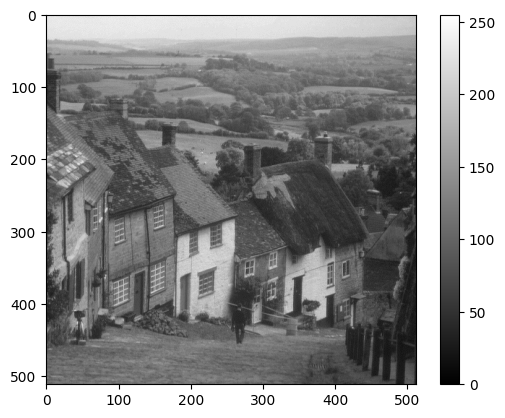

In [40]:
invImg= np.uint8(invImg)
print(invImg.dtype)
plt.imshow(invImg[:,:,0],vmin= 0, vmax= 255, cmap= "gray")
plt.colorbar()

### Retrieving image with only magnitude

In [41]:
invImg= cv.idft(dft[:,:,0], flags= cv.DFT_SCALE)

In [42]:
invImg = invImg- invImg.min()
invImg = 255* (invImg/ invImg.max())

Text(0.5, 1.0, 'Original image')

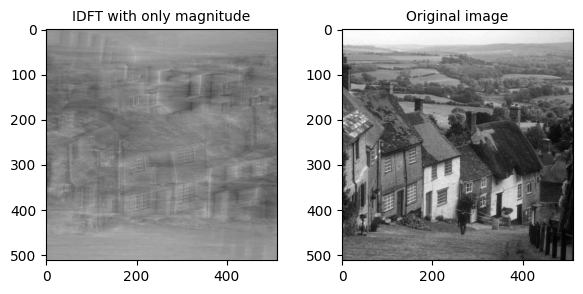

In [43]:
mInvImg= np.uint8(invImg)
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (7,3))
im = ax[0].imshow(mInvImg, cmap= "gray")
ax[1].imshow(img1, cmap= "gray")
ax[0].set_title("IDFT with only magnitude", fontsize= 10)
ax[1].set_title("Original image", fontsize= 10)

### Retrieving image with only phase

In [44]:
invImg= cv.idft(dft[:,:, 1], flags= cv.DFT_SCALE)
print(invImg.shape)
print(invImg.dtype)
print(invImg.max())

(512, 512)
float32
174.56778


In [45]:
invImg = invImg- invImg.min()
invImg = 255* (invImg/ invImg.max())

Text(0.5, 1.0, 'Original image')

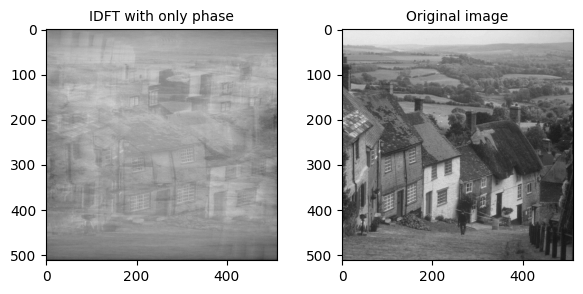

In [46]:
pInvImg= np.uint8(invImg)
plt.figure(figsize= (7, 3))
plt.subplot(1,2,1)
plt.imshow(pInvImg, cmap= "gray", vmin= 0, vmax= 255)
plt.title("IDFT with only phase", fontsize= 10)
plt.subplot(1,2,2)
plt.imshow(img1, cmap= "gray", vmin= 0, vmax= 255)
plt.title("Original image", fontsize= 10)

Text(0.5, 1.0, 'Original')

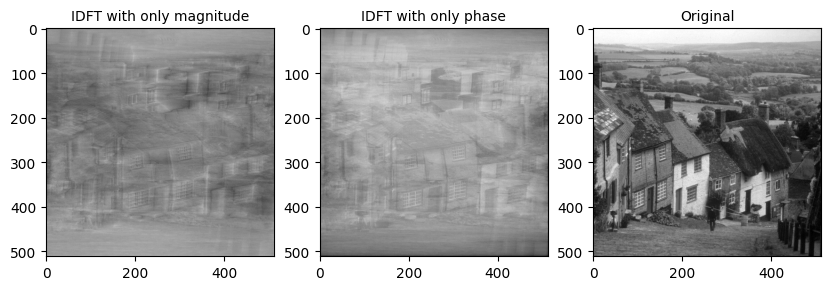

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.imshow(mInvImg, cmap= "gray")
plt.title("IDFT with only magnitude", fontsize= 10)

plt.subplot(1,3,2)
plt.imshow(pInvImg, cmap= "gray")
plt.title("IDFT with only phase", fontsize= 10)

plt.subplot(1,3,3)
plt.imshow(img1, cmap= "gray")
plt.title("Original", fontsize= 10)

## Low pass filter in frequency domain

### Create mask

(512, 512)

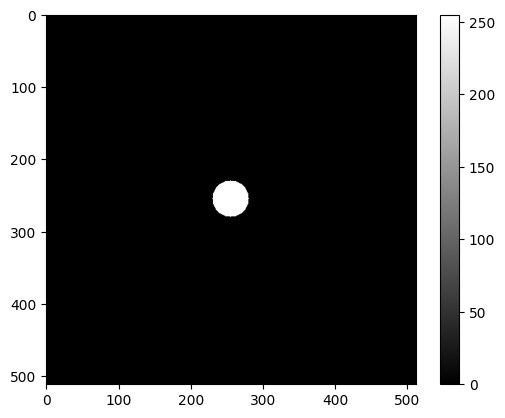

In [48]:
filter= np.uint8(np.zeros(shape= (512, 512)))
cv.circle(filter,center= (255, 255) ,radius= 25, color= (255, 255, 255), thickness= -1)
plt.imshow(filter, cmap= "gray", vmin= 0, vmax= 255)
plt.colorbar()
filter.shape

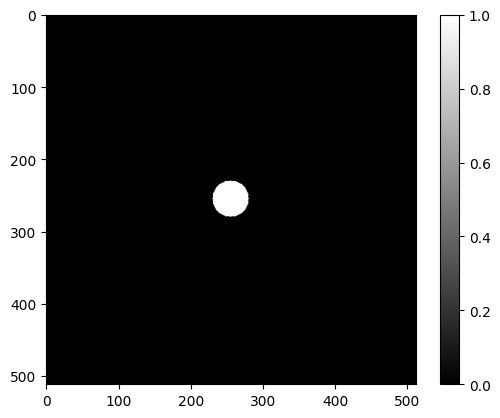

In [49]:
filter[filter == 255]= 1
plt.imshow(filter, cmap= "gray")
plt.colorbar()

In [50]:
def createMask(shape, center, radius):
    filter= np.uint8(np.zeros(shape= shape))
    cv.circle(filter,center= center ,radius= radius, color= (255, 255, 255), thickness= -1)
    filter[filter == 255]= 1
    plt.imshow(filter, cmap= "gray")
    plt.colorbar()
    return filter

## Apply mask over fourier spectrum

### Applying mask only to magnitude spectrum

In [51]:
magnitude_spectrum= magnitude_spectrum * filter

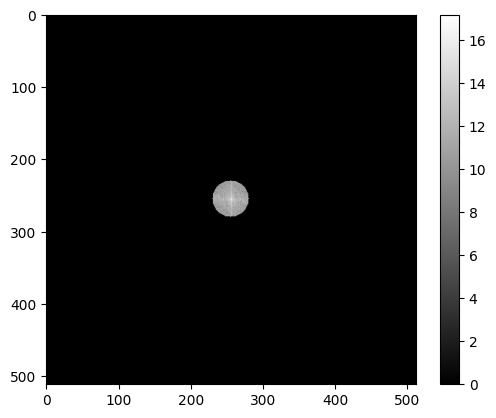

In [52]:
plt.imshow(magnitude_spectrum, cmap= "gray")
plt.colorbar()

In [53]:
dft_shift[:, :, 0] *= filter

In [54]:
dft= np.fft.ifftshift(dft_shift)

In [55]:
lowPassedImg= cv.idft(dft)
print(lowPassedImg.max())
print(lowPassedImg.min())
lowPassedImg.shape

69038840.0
-1918638.1


(512, 512, 2)

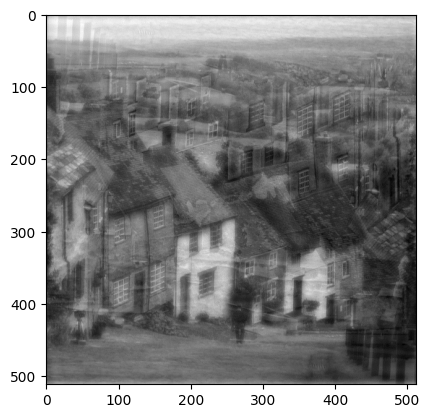

In [56]:
plt.imshow(lowPassedImg[:,:,0], cmap = "gray")

In [57]:
lowPassedImg= np.abs(lowPassedImg)
# lowPassedImg= lowPassedImg[:,:,0]
# lowPassedImg-= lowPassedImg.min()
# lowPassedImg/= lowPassedImg.max()
# lowPassedImg*= 255
# lowPassedImg= np.uint8(lowPassedImg)

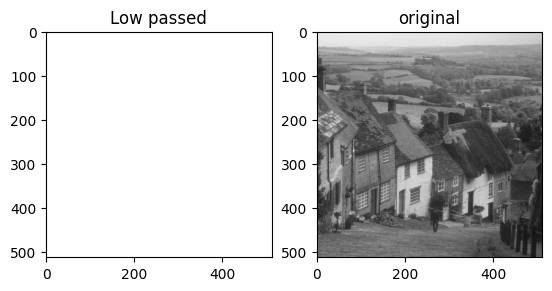

In [58]:
show2img(lowPassedImg[:,:, 0], img1, "Low passed", "original")

### Applying mask to both magnitude spectrum and phase

In [59]:
def LowPassFilter(input, radius):
    image_shape= input.shape
    center = (image_shape[0] // 2, image_shape[1] // 2)
    filter= createMask(image_shape, center, radius)
    dft = cv.dft(np.float32(input),flags = cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    dft_shift[:,:,0] *= filter
    dft_shift[:,:,1] *= filter
    dft = np.fft.ifftshift(dft_shift)
    output= cv.idft(dft, flags= cv.DFT_SCALE)
    output= np.abs(output)
    return output[:,:,0]

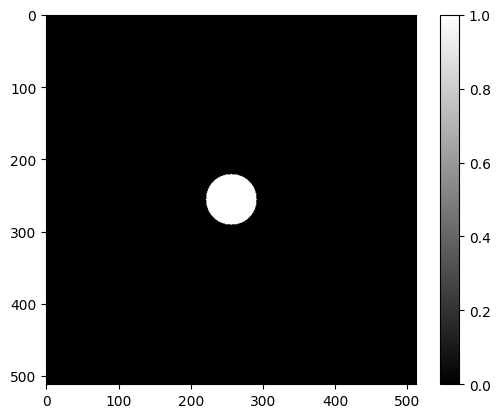

In [60]:
lowPassedImg= LowPassFilter(img1, 35)

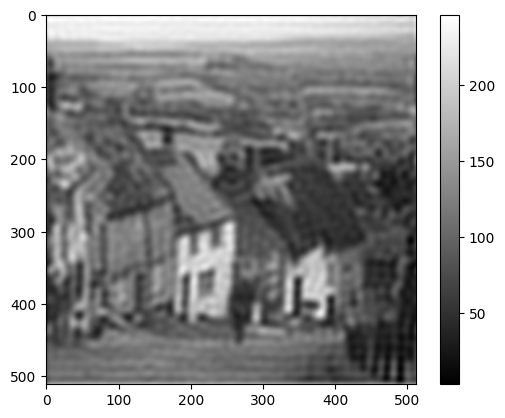

In [61]:
plt.imshow(lowPassedImg, cmap= "gray")
plt.colorbar()

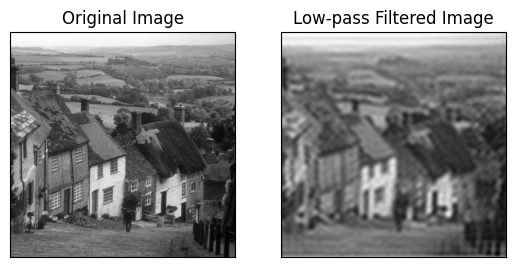

In [62]:


def low_pass_filter(image, cutoff_frequency):
    # Compute the 2D Fourier transform of the image
    f = np.fft.fft2(image)
    
    # Shift the zero-frequency component to the center
    fshift = np.fft.fftshift(f)
    
    # Get the rows and columns of the image
    rows, cols = image.shape
    
    # Create a mask with ones in the low frequencies and zeros in the high frequencies
    mask = np.zeros((rows, cols), np.uint8)
    center_row, center_col = rows // 2, cols // 2
    mask[center_row-cutoff_frequency:center_row+cutoff_frequency, center_col-cutoff_frequency:center_col+cutoff_frequency] = 1
    
    # Apply the mask to the shifted Fourier transform
    fshift_filtered = fshift * mask
    
    # Shift the zero-frequency component back to the corner
    f_filtered = np.fft.ifftshift(fshift_filtered)
    
    # Compute the inverse Fourier transform
    image_filtered = np.fft.ifft2(f_filtered)
    
    # Take the absolute value to get the magnitude
    image_filtered = np.abs(image_filtered)
    
    return image_filtered


# Apply low-pass filter with cutoff frequency of 30
filtered_image = low_pass_filter(img1, 30)

# Display the original and filtered images
plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Low-pass Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()


In [63]:
def LowPassFilter2(input, radius):
    image_shape= input.shape
    center = (image_shape[0] // 2, image_shape[1] // 2)
    filter= createMask(image_shape, center, radius)
    dft = np.fft.fft2(input)
    dft_shift = np.fft.fftshift(dft)
    dft_shift *= filter
    dft = np.fft.ifftshift(dft_shift)
    output= np.fft.ifft2(dft)
    output= np.abs(output)
    return output

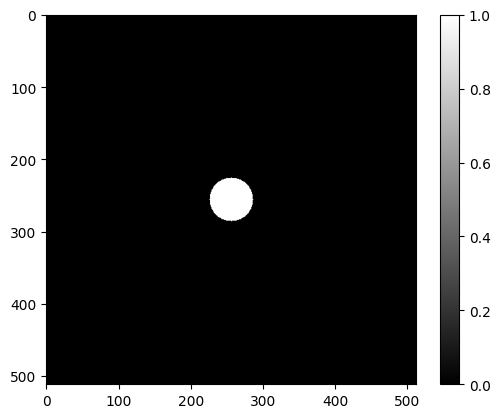

In [64]:
lowPassedImg= LowPassFilter2(img1, 30)

In [65]:
lowPassedImg.shape

(512, 512)

dtype('float64')

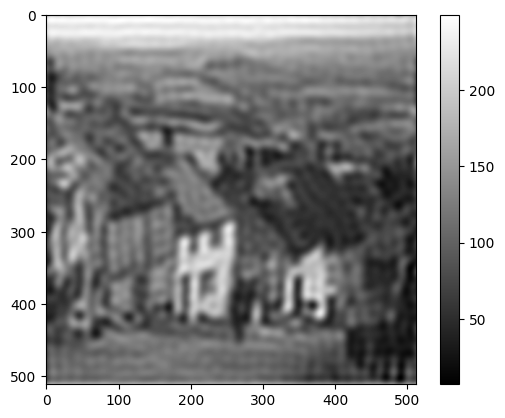

In [66]:
plt.imshow(lowPassedImg, cmap= "gray")
plt.colorbar()
lowPassedImg.dtype

## High Pass filter

In [67]:
def createMask2(shape, center, radius):
    filter= np.uint8(np.ones(shape= shape))
    cv.circle(filter,center= center ,radius= radius, color= (255, 255, 255), thickness= -1)
    filter[filter == 255]= 0
    plt.figure()
    plt.imshow(filter, cmap= "gray")
    plt.colorbar()
    return filter

In [68]:
def HighPassFilter(input, radius):
    image_shape= input.shape
    center = (image_shape[0] // 2, image_shape[1] // 2)
    filter= createMask2(image_shape, center, radius)
    dft = np.fft.fft2(input)
    dft_shift = np.fft.fftshift(dft)
    dft_shift *= filter
    dft = np.fft.ifftshift(dft_shift)
    output= np.fft.ifft2(dft)
    output= np.abs(output)
    output2= np.uint8(255* (output/ output.max()))
    plt.figure(figsize= (15, 15))
    show2img(input, output2, "Original", "High Passed image")
    return output

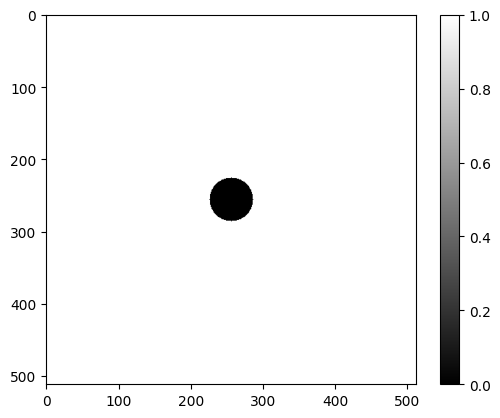

<Figure size 1500x1500 with 0 Axes>

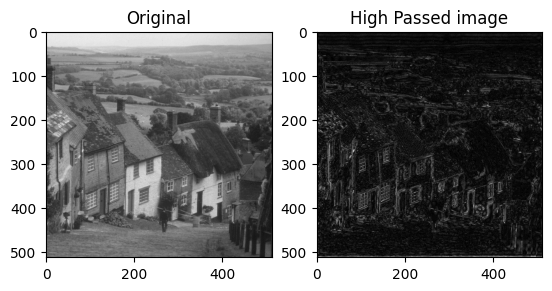

In [69]:
highPassedImg1= HighPassFilter(img1, 30)

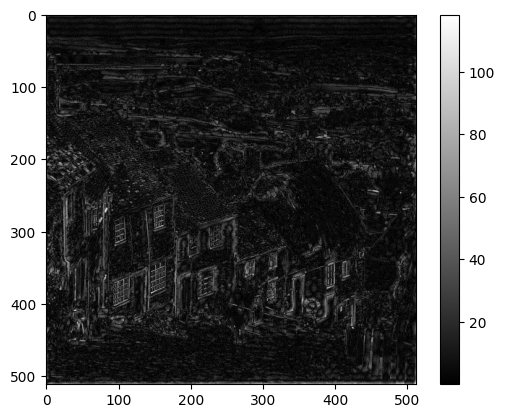

In [70]:
plt.imshow(highPassedImg1, cmap= "gray")
plt.colorbar()

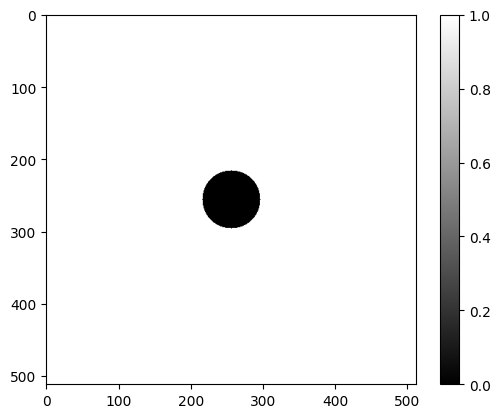

<Figure size 1500x1500 with 0 Axes>

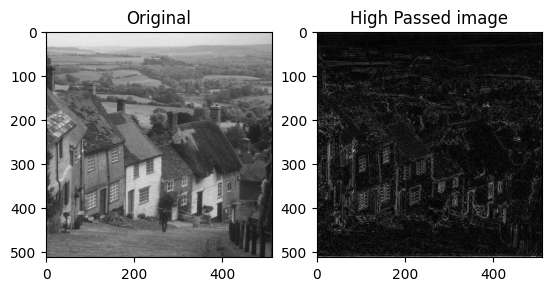

In [71]:
highPassedImg2= HighPassFilter(img1, 40)

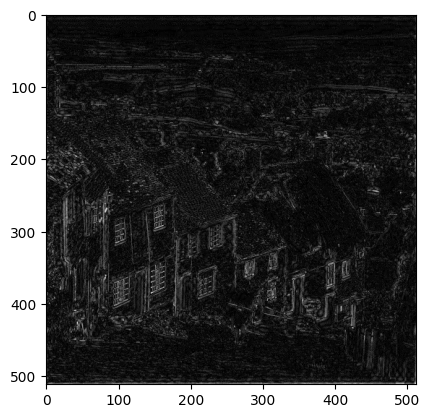

In [72]:
plt.imshow(highPassedImg2, cmap= "gray")

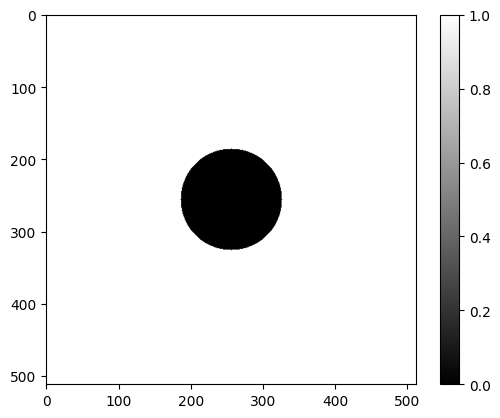

<Figure size 1500x1500 with 0 Axes>

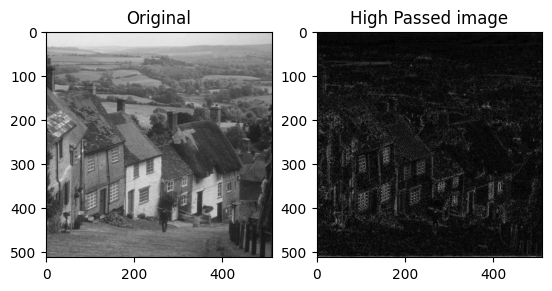

In [73]:
highPassedImg3= HighPassFilter(img1, 70)

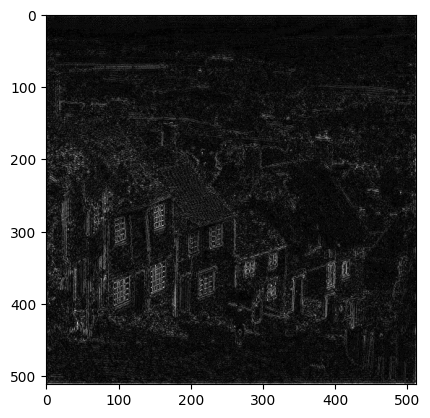

In [74]:
plt.imshow(highPassedImg3, cmap= "gray")

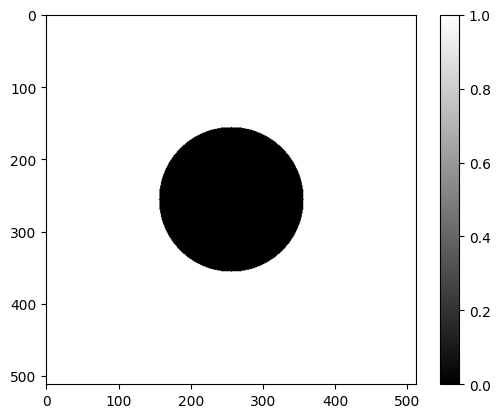

<Figure size 1500x1500 with 0 Axes>

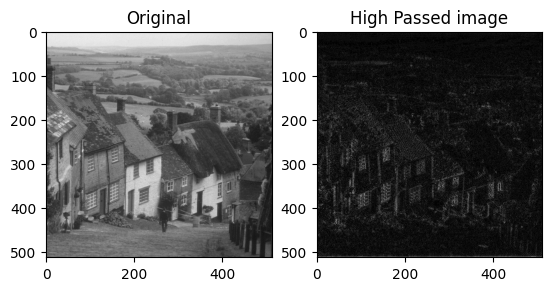

In [75]:
highPassedImg4= HighPassFilter(img1, 100)

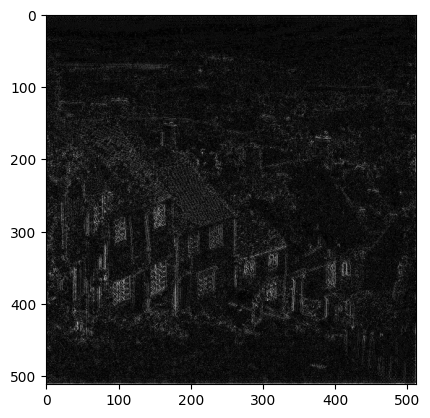

In [76]:
plt.imshow(highPassedImg4, cmap= "gray")

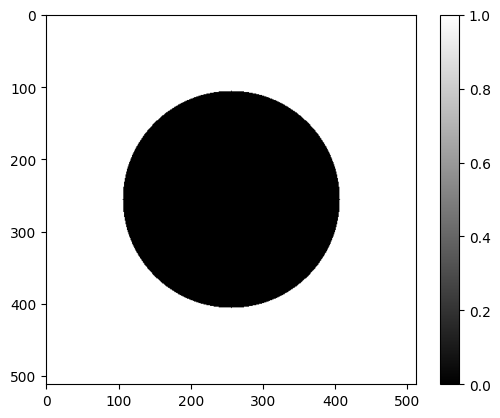

<Figure size 1500x1500 with 0 Axes>

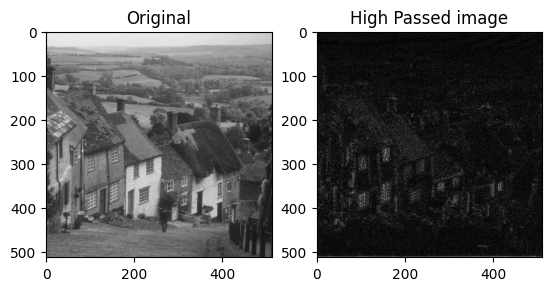

In [77]:
highPassedImg5= HighPassFilter(img1, 150)

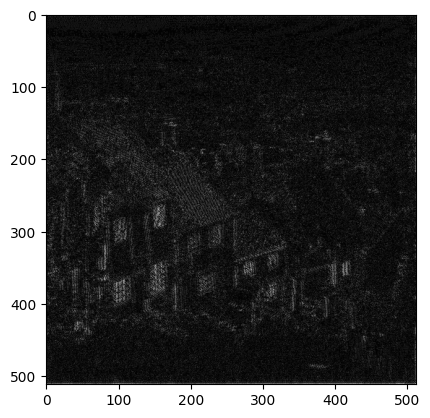

In [78]:
plt.imshow(highPassedImg5, cmap= "gray")

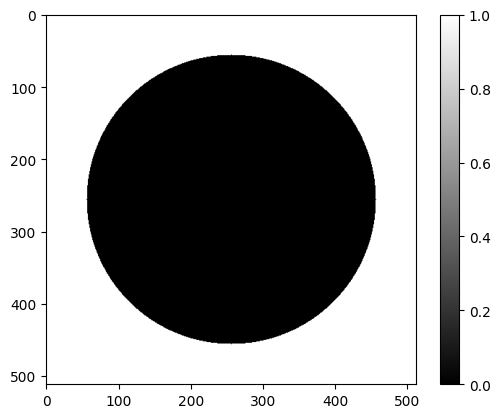

<Figure size 1500x1500 with 0 Axes>

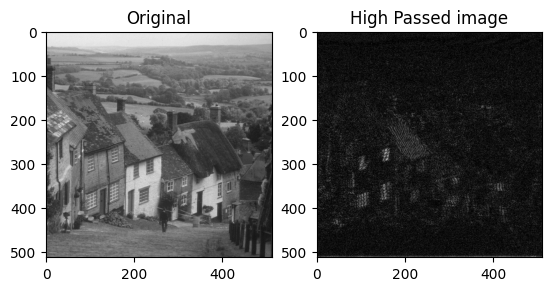

In [79]:
highPassedImg6= HighPassFilter(img1, 200)

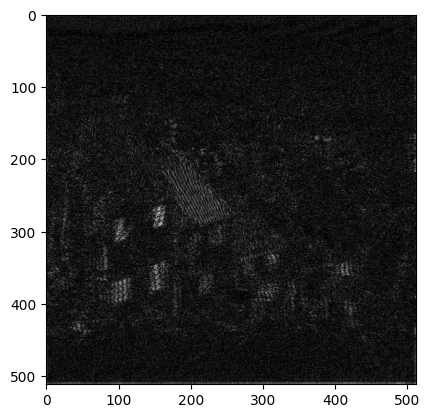

In [80]:
plt.imshow(highPassedImg6, cmap= "gray")

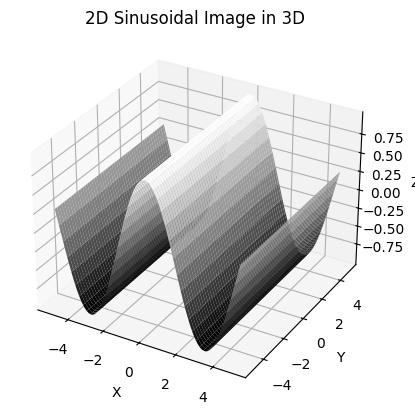

In [118]:
#from mpl_toolkits.mplot3d import Axes3D

# Define parameters
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.cos(x)  # Example sinusoidal function, you can replace this with your own function


# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='gray')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D Sinusoidal Image in 3D')

plt.show()


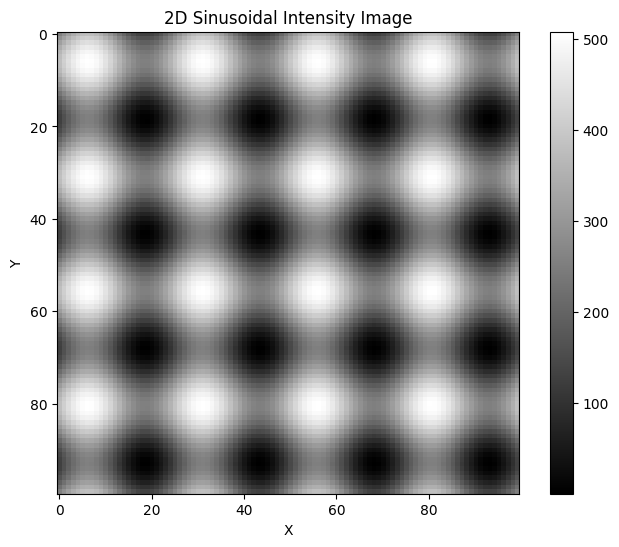

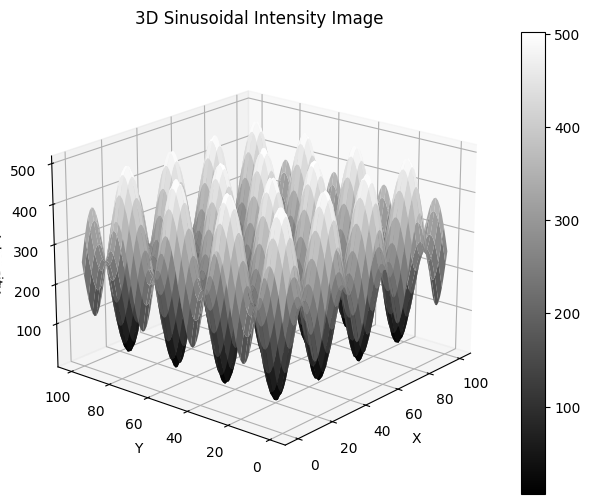

In [131]:


# Generate sinusoidal intensities
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
x, y = np.meshgrid(x, y)
freq= 4
intensities =127* (1 + np.sin(2* np.pi* freq* y/ 100) + 1 + np.sin(2* np.pi* freq* x/ 100)) # Example sinusoidal intensity pattern, you can modify this as needed

# Display as 2D plot
plt.figure(figsize=(8, 6))
plt.imshow(intensities, cmap='gray')
plt.colorbar()
plt.title('2D Sinusoidal Intensity Image')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Display as 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, intensities, cmap='gray')
fig.colorbar(surf)
ax.set_title('3D Sinusoidal Intensity Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.view_init(elev=20, azim=220)
plt.show()


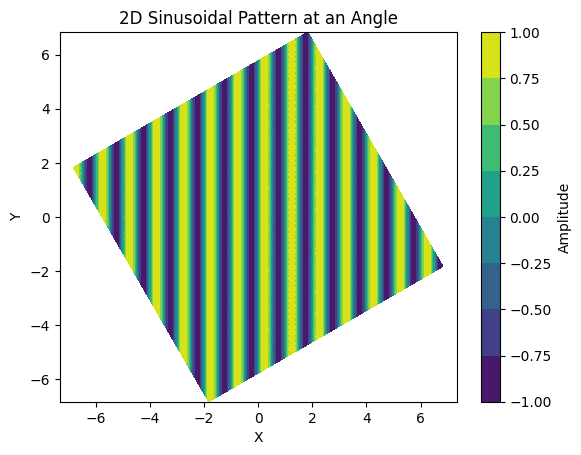

In [129]:


# Define the parameters of the sinusoidal function
amplitude = 1.0
frequency = 1.0  # Adjust the frequency as needed
phase = 0.0

# Define the grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Define the rotation angle in radians
angle = np.radians(30)  # Adjust the angle as needed

# Apply rotation transformation to the grid
X_rotated = X * np.cos(angle) - Y * np.sin(angle)
Y_rotated = X * np.sin(angle) + Y * np.cos(angle)

# Evaluate the sinusoidal function on the rotated grid
Z = amplitude * np.sin(2 * np.pi * frequency * X_rotated + phase)

# Plot the sinusoidal pattern
plt.figure()
plt.contourf(X_rotated, Y_rotated, Z, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Sinusoidal Pattern at an Angle')
plt.axis('equal')  # Equal aspect ratio for better visualization
plt.show()
